In [ ]:
import keras
import keras.backend as K
from keras.layers.core import Activation
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Conv1D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
column_name =  ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21' ]


In [ ]:
df002 = pd.read_table('dataset/FD001/test_FD001.txt', header=None,delim_whitespace=True)


In [ ]:
df002.columns = column_name
df002

In [ ]:
group = df002.groupby('id')
list(group)

In [ ]:
for id, id_df002 in group:
    print(id)
    print(id_df002)

In [ ]:
random_test = group.get_group(21)
random_test

In [ ]:
# random_test.to_csv("random_eng_FD002.csv")

Preprocess the randomly-Test-dataset

In [ ]:
cycle = 130

def train_data_prep(train_df):
      """
       A function to preprocess the training dataset for piece-wise RUL
       estimation
       
       Parameter:
         
         training dataframe (FD001-4)
        
       Returns:
         
         train_df, a preprocessed dataframe with column names
        and target variable.

      """
      rul = pd.DataFrame(train_df.groupby("id")["cycle"].max()).reset_index()
      rul.columns = ["id", "max"]
      train_df = train_df.merge(rul, on=["id"], how="left")
      train_df["RUL"] = train_df["max"] - train_df["cycle"]
      train_df.drop("max", axis=1, inplace=True)
      train_df["R_early"] = train_df["RUL"].apply(lambda x: cycle if x >= cycle else x)
      train_df = train_df.drop(["RUL"], axis=1)
      return train_df

In [ ]:
random_test_rul = train_data_prep(random_test)
random_test_rul


In [ ]:
def train_test_scaler(train_data, test_data):

    """function to standardize the dataset"""

    train_data["cycle_norm"] = train_data["cycle"]
    cols_normalize = train_data.columns.difference(["id", "cycle", "R_early"])
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_train_df = pd.DataFrame(
        min_max_scaler.fit_transform(train_data[cols_normalize]),
        columns=cols_normalize,
        index=train_data.index,
    )
    join_df = train_data[train_data.columns.difference(cols_normalize)].join(
        norm_train_df
    )
    train_df = join_df.reindex(columns=train_data.columns)

    # MinMax normalization (from 0 to 1)
    test_data["cycle_norm"] = test_data["cycle"]
    norm_test_df = pd.DataFrame(
        min_max_scaler.transform(test_data[cols_normalize]),
        columns=cols_normalize,
        index=test_data.index,
    )
    test_join_df = test_data[test_data.columns.difference(cols_normalize)].join(
        norm_test_df
    )
    test_df = test_join_df.reindex(columns=test_data.columns)
    test_df = test_df.reset_index(drop=True)
    return train_df, test_df

In [ ]:
random_test, random_test_rul = train_test_scaler(random_test, random_test_rul)

random_test_rul.to_csv("random_eng_FD001-21.csv")
random_test_rul

visualization of Max-RUL for datasets

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

Duplicate key in file '/Users/chengyingzhu/.matplotlib/matplotlibrc', line 2 ('backend: MacOSX')


In [4]:
file = 'train_FD001'
train_df = pd.read_table('dataset/FD001/' + file + '.txt', header=None, delim_whitespace=True)
train_df.columns = column_name
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
train_df = train_df.sort_values(["id", "cycle"])
train_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [6]:
train_group = train_df.groupby('id')
train_rul = list(train_group)
# train_rul[259][1].shape[0]

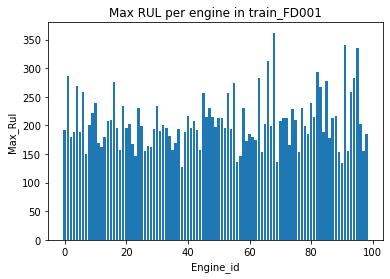

128


In [7]:
n = len(train_rul)
x = []
y = []
for i in range(0, (n-1)) :
    x.append(i)
    y.append(train_rul[i][1].shape[0])

plt.title('Max RUL per engine in ' + file )
plt.xlabel('Engine_id')
plt.ylabel('Max_Rul')
plt.bar(x,y)
plt.show ()

print(min(y))

# pearson corr

(20631, 26)
相关性矩阵为：
                 id     cycle  setting1  setting2  setting3  s1        s2  \
id        1.000000  0.057624 -0.020128 -0.005562       NaN NaN  0.013810   
cycle     0.057624  1.000000 -0.005723  0.011847       NaN NaN  0.534384   
setting1 -0.020128 -0.005723  1.000000  0.007699       NaN NaN  0.008654   
setting2 -0.005562  0.011847  0.007699  1.000000       NaN NaN  0.008663   
setting3       NaN       NaN       NaN       NaN       NaN NaN       NaN   
s1             NaN       NaN       NaN       NaN       NaN NaN       NaN   
s2        0.013810  0.534384  0.008654  0.008663       NaN NaN  1.000000   
s3        0.014968  0.528700 -0.007009  0.008776       NaN NaN  0.575761   
s4        0.024947  0.605036  0.009142  0.016596       NaN NaN  0.692766   
s5             NaN       NaN       NaN       NaN       NaN NaN       NaN   
s6        0.026487  0.110655 -0.003552  0.014384       NaN NaN  0.135540   
s7       -0.032611 -0.577702 -0.007940 -0.017088       NaN NaN -0.6

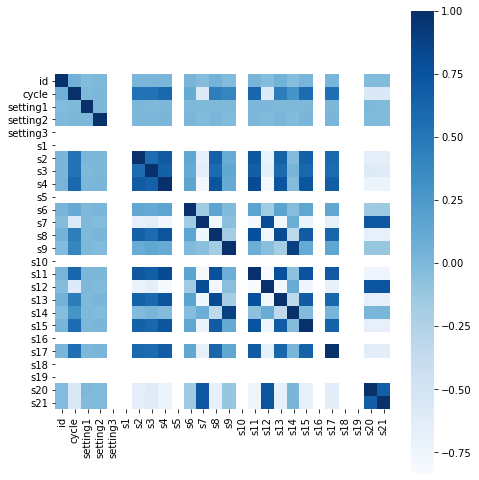

In [8]:


data = train_df
# data.drop(data.columns[4], axis = 1, inplace=True)
print(data.shape)


data_corr = pd.DataFrame(data)
dt_corr = data_corr.corr(method = 'spearman')
print("相关性矩阵为：\n",dt_corr)

plt.subplots(figsize=(7.5, 8.5)) # 设置画面大小
sns.heatmap(dt_corr, annot=False, vmax=1, square=True, cmap='Blues')
plt.show()

Piece-Wise RUL

In [9]:
def train_data_prep(train_df):
      """
       A function to preprocess the training dataset for piece-wise RUL
       estimation
       
       Parameter:
         
         training dataframe (FD001-4)
        
       Returns:
         
         train_df, a preprocessed dataframe with column names
        and target variable.

      """
      rul = pd.DataFrame(train_df.groupby("id")["cycle"].max()).reset_index()
      rul.columns = ["id", "max"]
      train_df = train_df.merge(rul, on=["id"], how="left")
      train_df["RUL"] = train_df["max"] - train_df["cycle"]
      train_df.drop("max", axis=1, inplace=True)
      train_df["R_early"] = train_df["RUL"].apply(lambda x: cycle if x >= cycle else x)
      train_df = train_df.drop(["RUL"], axis=1)
      return train_df

In [10]:
cycle = 130

train_df = train_data_prep(train_df)
train_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,R_early
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,130
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,130
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,130
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,130
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


visualization

In [11]:
group = train_df.groupby('id')
list(group)

[(1,
       id  cycle  setting1  setting2  setting3      s1      s2       s3  \
  0     1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
  1     1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
  2     1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
  3     1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
  4     1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
  ..   ..    ...       ...       ...       ...     ...     ...      ...   
  187   1    188   -0.0067    0.0003     100.0  518.67  643.75  1602.38   
  188   1    189   -0.0006    0.0002     100.0  518.67  644.18  1596.17   
  189   1    190   -0.0027    0.0001     100.0  518.67  643.64  1599.22   
  190   1    191   -0.0000   -0.0004     100.0  518.67  643.34  1602.36   
  191   1    192    0.0009   -0.0000     100.0  518.67  643.54  1601.41   
  
            s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
  0    1400.

In [12]:
for id, id_train_df in group:
    print(id)
    print(id_train_df)

1
     id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0     1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1     1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2     1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3     1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4     1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
..   ..    ...       ...       ...       ...     ...     ...      ...   
187   1    188   -0.0067    0.0003     100.0  518.67  643.75  1602.38   
188   1    189   -0.0006    0.0002     100.0  518.67  644.18  1596.17   
189   1    190   -0.0027    0.0001     100.0  518.67  643.64  1599.22   
190   1    191   -0.0000   -0.0004     100.0  518.67  643.34  1602.36   
191   1    192    0.0009   -0.0000     100.0  518.67  643.54  1601.41   

          s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
0    1400.60  14.62  ...  2388.02  8138.62 

In [13]:
Piece_Wise_RUL1 = group.get_group(1)
Piece_Wise_RUL1

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,R_early
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,130
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,130
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,130
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,130
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1


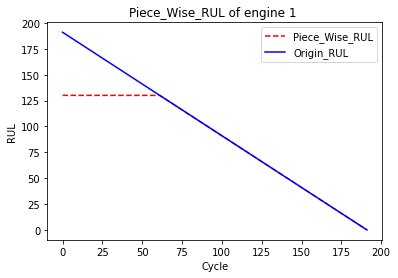

In [14]:
x = 192 - (Piece_Wise_RUL1['cycle'])
y = Piece_Wise_RUL1['R_early']

plt.title('Piece_Wise_RUL of engine 1 ')
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.plot(y,'r',linestyle='--')
plt.plot(x,'b')
plt.legend(['Piece_Wise_RUL','Origin_RUL'])
plt.show()